**Important! This is one possible solution to the homework; Deviating from this solution does not necessarely imply your question is wrong — there are arbitrary details that can change your results, these are taken into consideration while grading!**


# Homework 1: A sinister homework

By the end of this homework, we expect you to be able to:

1. Load data and handle data using pandas;
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy real-world datasets;
4. Aggregate your data in different (and hopefully helpful) ways;
5. Create meaningful visualizations to analyze the data;
6. Communicate your findings in a clear and concise manner


---

## Important Dates
- Homework release: Fri 13 Oct 2023
- **Homework due:** Fri 27 Oct 2023, 23:59
- Grade release: Mon 06 Nov 2023

---

## Some rules
1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)

3. Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.

4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation **(in markdown)**.

5. Back up any hypotheses and claims with data, since this is an important aspect of the course.

6. Please write all your comments in **English**, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. **If there are multiple notebooks present, we will not grade anything.**

7. We will **not run your notebook for you!** Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

8. In continuation to the previous point, interactive plots, such as those generated using the `plotly` package, should be strictly avoided!

9. Make sure to print results and/or dataframes that confirm you have properly addressed the task.


---

##  Context

Congratulations! You have just been hired as a data scientist at "The ByteBlasters", EPFL’s amateur baseball club. The team's manager, Mr. Russo, an eccentric millionaire with an innovative plan to dominate the Swiss baseball league, believes hiring left-handed pitchers (the people who throw the ball) will likely boost the team's performance. Yet, he is concerned about money, as he heard left-handed pitchers have historically earned more!

He tasked you to investigate this "sinister" issue and gave you some openly available data on the birthplace of this beautiful, dynamic sport --- the US.

**About the homework.** This homework consists of four tasks. In Task 0, you will familiarize yourself with the rules of baseball. In Task 1, you will process the data, getting it ready for analysis. In Task 2, you will analyze the data to answer Mr. Russo’s question. Lastly, in Task 3, you will conduct additional analyses that consider the longitudinal nature of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo


# Task 0 (Ungraded): Baseball 101

**0.1 —** Familiarize yourself with the data; we won't explain the data in-depth in this notebook. Instead, you should take your time to read the readme.txt file inside the data folder. Note that this data is available on [GitHub](https://github.com/chadwickbureau/baseballdatabank).

**0.2 —** Familiarize yourself with basic baseball rules. We will explain everything you need to know, but it will be helpful to get a basic understanding of it. Watching the video below should be enough! (Also available [here](https://www.youtube.com/watch?v=WMA8L5OpuDY).)

A couple of useful things to remember:
- **Pitchers** (try to) throw the ball
- **Batters** (try to) hit the ball with the bat
- **Catchers** (try to) catch the ball.


In [2]:
# YouTubeVideo('WMA8L5OpuDY', width=800, height=300)

---

# Task 1 (16 pts): Get to Know Your Data

As a good data scientist, you first load the data and perform some small sanity checks on it.

1. You are expected to continuously alter your dataframe as you complete the tasks. E.g., if you are asked to filter the data in a specific task, continue using the filtered dataset in the subsequent tasks.
2. When we tell you to "print the dataframe," make sure you print it in a way that shows the total number of rows and columns in it (`display(df)` should suffice).

---

**1.1 —** Load the `People`, `Salaries`, and `Pitching` dataframes. Then:
- Filter the `Salaries`, and `Pitching` dataframes to remove all data after the year 2010.
- For the `Salaries` dataframe drop all duplicate salaries for players in a given year. In other words, if a player (uniquely identified by `PlayerID`) has multiple salaries in a year (`yearID`), keep the first occurence in the dataframe and drop the remaining.
- Calculate the size of each dataframe. 

Make [deep copies](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html) of all dataframes as you filter them.

Hints:
- 2007 should be included in the data.
- 2010 should be included in the data.
- 2011 should not be included in the data.

In [2]:
# Loads data
df_people = pd.read_csv("./data/baseballdatabank-2023/core/People.csv")
df_salaries = pd.read_csv("./data/baseballdatabank-2023/contrib/Salaries.csv")
df_pitching = pd.read_csv("./data/baseballdatabank-2023/core/Pitching.csv")


# Filters data
df_salaries = df_salaries[df_salaries["yearID"] <= 2010].copy(deep=True)
df_pitching = df_pitching[df_pitching["yearID"] <= 2010].copy(deep=True)

# Drop duplicates
df_salaries = df_salaries.drop_duplicates(["playerID", "yearID"], keep="first").copy(deep=True)

print("Size df_people", len(df_people))
print("Size df_pitching", len(df_pitching))
print("Size df_salaries", len(df_salaries))

Size df_people 20676
Size df_pitching 40433
Size df_salaries 21351


**1.2 —** The `throws` column in the `People` dataframe indicates, for each player, whether they throw with the left ("L") or right hand ("R"). Check what values are in the column and drop rows containing any value that is not "L" or "R," again, make a deep copy when you filter the dataframe.

Hint: Remember NaNs!

In [6]:
# Check values in the "throws" column
df_people.loc[df_people.throws.isna(), "throws"] = "NA"
display(df_people.groupby("throws").count().playerID)

# remove any value that is not "L" or "R"
df_people = df_people[df_people["throws"].isin(["L", "R"])].copy(deep=True)

throws
L     3970
R    15728
Name: playerID, dtype: int64

**1.3 —** Merge the `People` dataframe with the `Pitching` dataframe. Your merge should populate the pitching data with statistics about the players. Print the resulting dataframe.

In [7]:
# Merge pitching dataframe to include players, pitching hand and salary
df_pitching = df_pitching.merge(df_people, on="playerID", how="left")
df_pitching

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,Brainard,Asahel,150.0,68.0,NaN,R,1871-05-05,1874-10-14,braia102,brainas01
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,Ferguson,Robert Vavasour,149.0,69.0,B,R,1871-05-18,1884-07-01,fergb101,fergubo01
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,Fisher,William Charles,164.0,69.0,R,R,1871-05-06,1878-07-09,fishc102,fishech01
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40428,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Zambrano,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01
40429,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Ziegler,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01
40430,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Zimmermann,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02
40431,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Zito,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01


**1.4 —** You realize some of the data for the `throws` column is missing! Estimate the percentage of missing data points per year in that column, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 1892.

Data missing 1892: 0.045454545454545456


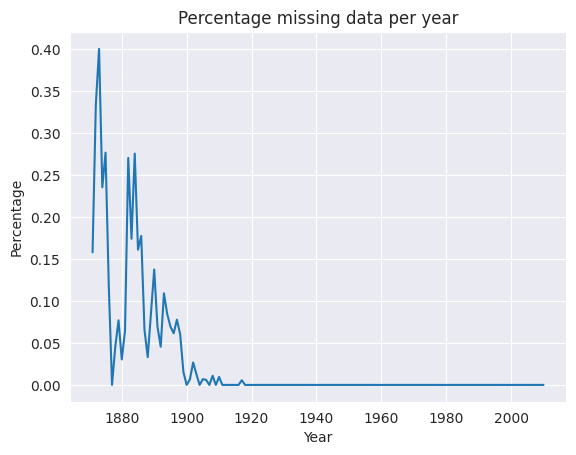

In [8]:
# Indicator variable showing that something is NA
#df_pitching["throws_is_na"] = df_pitching.throws.isna()
df_pitching["throws_is_na"] = df_pitching['throws'].isna()
# Mean of this variable is the % of missing data
missing_throws_data = df_pitching.groupby("yearID").throws_is_na.mean()

# Very simple plot
plt.plot(missing_throws_data)
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.title("Percentage missing data per year");

print("Data missing 1892:", missing_throws_data.loc[1892])

**1.5 —** Filter the dataset you just merged (hereinafter `Pitching-People`) to just contain data from after 1920 (with 1920 included). Do the same with the `Salaries` dataset. Make deep copies of both dataframes as you filter them.



In [7]:
# Simple filtering
df_pitching = df_pitching[df_pitching["yearID"] >= 1920].copy(deep=True)
df_salaries = df_salaries[df_salaries["yearID"] >= 1920].copy(deep=True)
df_salaries

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
21449,2010,WAS,NL,walkety01,650000
21450,2010,WAS,NL,wangch01,2000000
21451,2010,WAS,NL,willijo03,4600000
21452,2010,WAS,NL,zimmejo01,401000


**1.6 —**  Merge the `Pitching-People` dataframe with the `Salaries` dataframe. Your merge should populate the `Pitching-People` dataframe with statistics about the pitchers'salaries across the years. Note that the `Salaries` dataframe contains the salary **per year.** Print the resulting dataframe.

In [10]:
# Simple merging, note that we must merge on two things!
df_pitching = df_pitching.merge(df_salaries, on=["playerID", "yearID"], how="left")
df_pitching

,playerID,yearID,stint,teamID_x,lgID_x,W,L,G,GS,CG,...,bats,throws,debut,finalGame,retroID,bbrefID,throws_is_na,teamID_y,lgID_y,salary
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,R,1871-05-05,1874-10-14,braia102,brainas01,False,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,B,R,1871-05-18,1884-07-01,fergb101,fergubo01,False,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,R,R,1871-05-06,1878-07-09,fishc102,fishech01,False,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40428,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,B,R,2001-08-20,2012-09-21,zambc001,zambrca01,False,CHN,NL,18875000.0
40429,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01,False,OAK,AL,410000.0
40430,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02,False,NaN,NaN,NaN
40431,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,L,L,2000-07-22,2015-09-30,zitob001,zitoba01,False,SFN,NL,18500000.0


**1.7 —** You realize some of the data for the `salary` column is missing! Estimate the percentage of missing data points per year, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 2002.


Data missing 2002: 0.3626707132018209


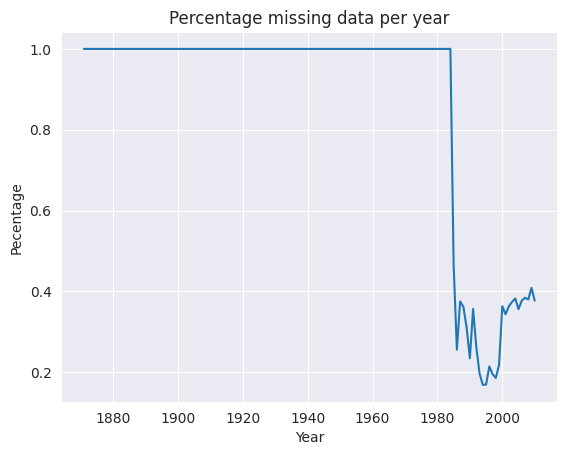

In [11]:
# Indicator variable showing that something is NA
df_pitching["salary_is_na"] = df_pitching.salary.isna()
missing_salary_data = df_pitching.groupby("yearID").salary_is_na.mean()

# Simple plot
#plt.plot(missing_salary_data)
#plt.ylabel("Percentage")
#plt.xlabel("Year")
#plt.title("Percentage missing data per year")
plt.plot(missing_salary_data)
plt.ylabel("Pecentage")
plt.xlabel("Year")
plt.title("Percentage missing data per year")
print("Data missing 2002:", missing_salary_data.loc[2002])

**1.8 —** Find and print the first and last year for which there exists any salary data. Filter the resulting, merged dataframe to include only data between these two dates. Again make sure you make a deep copy of the dataframe, and print the resulting dataframe.

In [14]:
# Estimates earliest and latest dates
min_date = df_pitching[df_pitching["salary_is_na"] == False].yearID.min()
max_date = df_pitching[df_pitching["salary_is_na"] == False].yearID.max()

print("Earliest date:", min_date, "/ Latest date:", max_date)
print("Earliest data: ",min_date, "/ Latest data: ", max_date)
# Gets the
df_pitching = df_pitching[(df_pitching["yearID"] >= min_date) 
                          & (df_pitching["yearID"] <= max_date)].copy(deep=True)

df_pitching

Earliest date: 1985 / Latest date: 2010
Earliest data:  1985 / Latest data:  2010


,playerID,yearID,stint,teamID_x,lgID_x,W,L,G,GS,CG,...,throws,debut,finalGame,retroID,bbrefID,throws_is_na,teamID_y,lgID_y,salary,salary_is_na
24984,aasedo01,1985,1,BAL,AL,10,6,54,0,0,...,R,1977-07-26,1990-10-03,aased001,aasedo01,False,NaN,NaN,NaN,True
24985,abregjo01,1985,1,CHN,NL,1,1,6,5,0,...,R,1985-09-04,1985-10-03,abrej001,abregjo01,False,NaN,NaN,NaN,True
24986,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,R,1983-04-07,1992-06-14,ackej001,ackerji01,False,TOR,AL,170000.0,False
24987,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,L,1981-09-07,1993-06-19,agosj001,agostju01,False,CHA,AL,147500.0,False
24988,aguilri01,1985,1,NYN,NL,10,7,21,19,2,...,R,1985-06-12,2000-09-06,aguir001,aguilri01,False,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40428,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,R,2001-08-20,2012-09-21,zambc001,zambrca01,False,CHN,NL,18875000.0,False
40429,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,R,2008-05-31,2018-09-29,ziegb001,zieglbr01,False,OAK,AL,410000.0,False
40430,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,R,2009-04-20,2021-05-07,zimmj003,zimmejo02,False,NaN,NaN,NaN,True
40431,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,L,2000-07-22,2015-09-30,zitob001,zitoba01,False,SFN,NL,18500000.0,False


---

# Task 2 (16 pts)

Task 1, was a softball? Huh? For Task 2, you will use a dataset similar to what you obtained at the end of Task 1. This code loads it.


In [15]:
# PROVIDED CODE

df = pd.read_csv("./data/dataset-task-2.csv")
df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,prietar01,1998,1,OAK,AL,0,1,2,2,0,...,Ariel,220.0,75.0,R,R,1995-07-02,2001-05-10,priea001,prietar01,NaN
1,pooleji02,2000,1,DET,AL,1,0,18,0,0,...,James Richard,190.0,74.0,L,L,1990-06-15,2000-06-01,poolj001,pooleji02,200000.0
2,leecl02,2007,1,CLE,AL,5,8,20,16,1,...,Clifton Phifer,205.0,75.0,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,3000000.0
3,purceda01,2010,1,TOR,AL,1,1,33,0,0,...,David Kent,245.0,77.0,L,L,2008-04-18,2013-09-20,purcd001,purceda01,NaN
4,gundeer01,1992,1,SEA,AL,2,1,9,0,0,...,Eric Andrew,175.0,72.0,R,L,1990-04-11,2000-05-17,gunde001,gundeer01,NaN


Some comments about this dataset:
- This is a sample of the dataset obtained in Task 1. 
- Even if you  did everything correctly for Task 1, this dataframe would contain a different number of rows --- as it is a sample.
- This prevent that mistakes made in Task 1 cascade into Tasks 2 and 3.


With this data, you will proceed to investigate differences in the salaries and performance of left-handed and right-handed pitchers.

---

**2.1 —** Plot the Complementary cumulative distribution function (CCDF) of salary for left-handed and right-handed athletes. Consider data from all years.

Text(0.5, 1.0, 'CCDF Salary')

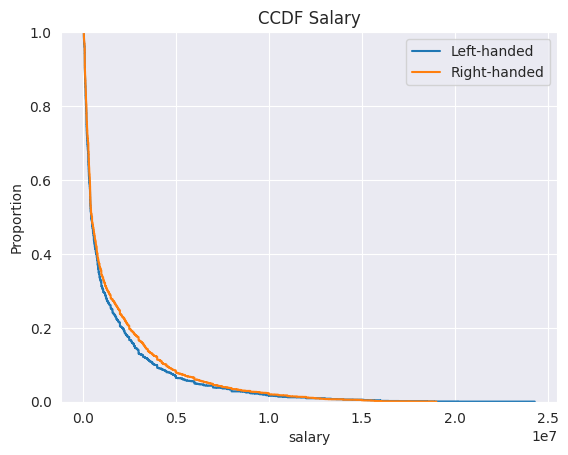

In [16]:
import seaborn as sns
import warnings

# Creates complementary CDF
sns.ecdfplot(df[df["throws"] == "L"].salary, label="Left-handed", complementary=True)
sns.ecdfplot(df[df["throws"] == "R"].salary, label="Right-handed", complementary=True)
plt.legend()
plt.title("CCDF Salary")

**2.2 —** /Discuss:/ This plot has an issue which severely limits the amount of information one can draw from it. Describe the issue and propose a solution to address it.

**A:** The distribution is heavy tailed, and thus most of the players are shown in a very small part of the plot; in the far left of the plot. One solution to this is to log the x-axis.

**2.3 —** Implement the solution proposed by yourself in the previous question.

Text(0.5, 1.0, 'CCDF Salary')

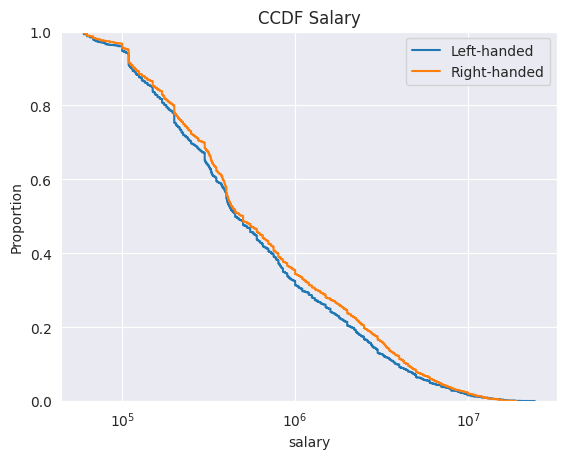

In [17]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.ecdfplot(df[df["throws"] == "L"].salary, label="Left-handed", complementary=True)
sns.ecdfplot(df[df["throws"] == "R"].salary, label="Right-handed", complementary=True)
plt.xscale("log")
plt.legend()
plt.title("CCDF Salary")

**2.4 —** /Discuss:/ Considering this second version of the plot, describe what the plot shows with regard to the distribution of salaries from left- and right-handed pitchers.

**A:** We can see the line corresponding to right-handed players is always greater or equal than the line corresponding to left-handed players. This means that right-handed players earn better salaries. For each salary value x, shown in the x-axis, there are more right-handed players that earn values bigger than that salary compared to left-handed players.

**2.5—** Calculate the mean and the 95% confidence interval for the salary of left-handed and right-handed pitchers aggregating data across all years. Print the estimates. Additionally, present the estimates and the confidence intervals in a [point plot](https://seaborn.pydata.org/_images/pointplot_7_0.png). Calculate your confidence intervals using the standard error of the mean and ignoring missing values.

,mean,sem,low_ci,high_ci
throws,,,,
L,1.437233e+06,43164.996326,1.352629e+06,1.521836e+06
R,1.597010e+06,29339.498675,1.539505e+06,1.654516e+06


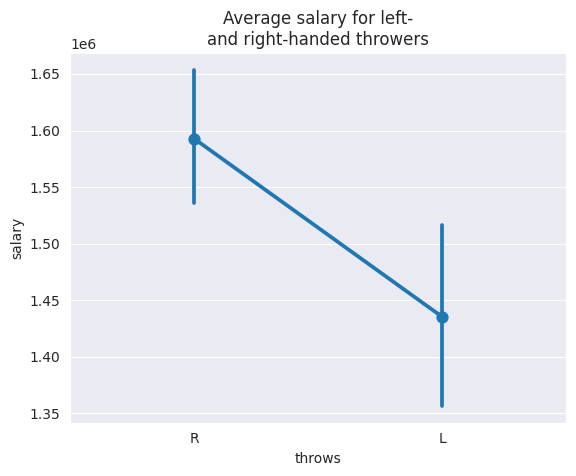

In [18]:
import seaborn as sns

salaries = df.groupby(["throws"]).salary.agg(["mean", "sem"])
salaries["low_ci"] = salaries["mean"] - 1.96 * salaries["sem"]
salaries["high_ci"] = salaries["mean"] + 1.96 * salaries["sem"]

# shows confidence intervals
display(salaries)

# simple plot
sns.pointplot(x="throws", y="salary", data=df_pitching)
plt.title("Average salary for left-\nand right-handed throwers");

**2.6 —** /Discuss:/ Can you tell whether the difference between the two distributions is statistically significant (at the .05 level of significance) from the image? Why?

**A1**: Yes, because they do not overlap!


If for some crazy reason they do overlap:

**A2**: No, because they overlap a little, so the difference could be significant or it could not.

**A3**: You can roughly actually tell with a weird rule of thumb. If the overlap of the error bars is smaller than 50% then it is probably significant :); see https://www.sciencedirect.com/science/article/abs/pii/S0167947310001568.

**2.7 —** Perform a t-test test comparing the salaries of left-handed and right-handed pitchers at the .05 level of significance. Consider data from all years. /Discuss:/ Who earns more?

In [19]:
import scipy.stats 
x1 = df[(df["throws"] == "L")].salary.dropna().values
x2 = df[(df["throws"] == "R")].salary.dropna().values
print(np.mean(x1), np.mean(x2))
display(scipy.stats.ttest_ind(x1, x2))


1437232.861328125 1597010.1359545896


TtestResult(statistic=-3.0106974397099378, pvalue=0.0026128052505378953, df=10293.0)

**A**: Left handed players earn less. The difference is statistically significant.

---

Now, let's turn to analyzing performance. A commonly used metric to evaluate the skill of a pitcher is to look at the batting average of the pitcher’s opponents. According to [Wikipedia](https://en.wikipedia.org/wiki/Batting_average_against),

> In baseball statistics, batting average against (denoted by BAA or AVG), also known as opponents' batting average (denoted by OBA), is a statistic that measures a pitcher's ability to prevent hits during official at bats. It can alternatively be described as the league's hitters' combined batting average against the pitcher.

The intuition is clear: if you are a pitcher, you do not want the batter actually to hit the ball. Thus, if you are a good pitcher, the opponent batter should miss a lot against you! Conveniently, this is already calculated on a yearly basis in our data.

---

**2.8 —** Considering data from all years, calculate the mean opponents' batting average for left- and right-handed pitchers. Run a t-test test to determine if this difference is statistically significant at the .05 level of significance. **Consider only pitchers in the years during which they have played atleast 5 games.** /Discuss:/ According to this approach, who are the better pitchers? Left-handed or right-handed pitchers?

In [22]:
import scipy.stats 

x1 = df[(df["throws"] == "L") ] [(df["G"]  >= 5)].BAOpp.values
x2 = df[(df["throws"] == "R") & (df["G"]  >= 5)].BAOpp.values
print("Mean lefties:", np.mean(x1))
print("Mean righties:", np.mean(x2))

display(scipy.stats.ttest_ind(x1, x2) )

Mean lefties: 0.27038519285529383
Mean righties: 0.2678352186208397


TtestResult(statistic=2.7523037123322776, pvalue=0.00592593162655335, df=13055.0)

**A**: Right-handed players are better. The difference is statistically significant.

# Task 3 (18 pts)

Before you report your results to Mr. Russo, you decide to run them by your favorite Applied Data Analysis' TA, Ms. Sakota. She seems skeptical! According to her, you should take into account the time variable!

**3.1 —** Repeat the analysis from tasks 2.7 and 2.8 considering only data from the year 2000. That is, use a t-test to determine the distribution of salaries (2.7) and opponents' batting average (2.8) for all data of the year 2000 only. 

In [24]:
x1 = df[(df["throws"] == "L") & 
                (df.yearID == 2000)].salary.dropna().astype("int")
x2 = df[(df["throws"] == "R") & 
                (df.yearID == 2000)].salary.dropna().astype("int")
scipy.stats.ttest_ind(x1, x2)


TtestResult(statistic=-0.3682145722424321, pvalue=0.7128996415072697, df=418.0)

In [25]:
x1 = df[(df["throws"] == "L") & (df["G"]  >= 5) & (df.yearID == 2000)].BAOpp.dropna().values
x2 = df[(df["throws"] == "R") & (df["G"]  >= 5) & (df.yearID == 2000)].BAOpp.dropna().values
display(scipy.stats.ttest_ind(x1, x2))

# shows mean
print("Mean lefties:", np.mean(x1))
print("Mean righties:", np.mean(x2))

TtestResult(statistic=0.17825458856772244, pvalue=0.8585867091589405, df=567.0)

Mean lefties: 0.2773856209150327
Mean righties: 0.2765192307692308


**A**: Considering only the year 2000, the difference disappeared it is no longer statistically significant for neither the salary nor the opponents' batting average.

**3.2 —** Create a single plot with 14 inches of width and 4 inches of height. The plot should contain three panels:
- Panel A: The percentage of left-handed pitchers per year;
- Panel B: The average salary of all pitchers per year
- Panel C: The average opponents' batting average of all pitchers per year.

Additionally, print, for the year 2007:
- the percentage of left-handed pitchers.
- the average salary.
- the average  opponents' batting average.

pct lefties 2007: 0.28160919540229884
avg salary 2007: 2600513.7372093024
avg baopp 2007: 0.27904597701149425


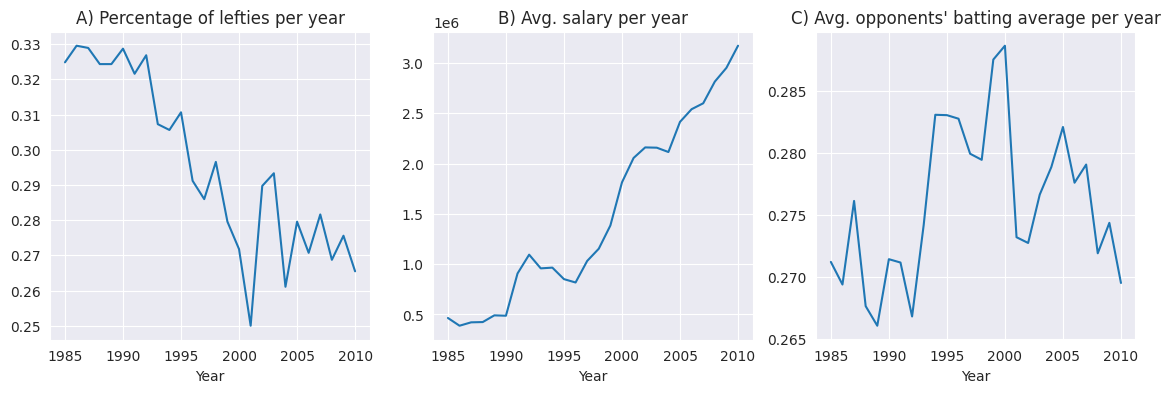

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(14,4))

#
df["throws_L"] = df["throws"] == "L"
throws_data_pct_lefties = df.groupby("yearID").throws_L.mean()
axs[0].plot(throws_data_pct_lefties)
axs[0].set_xlabel("Year")
axs[0].set_title("A) Percentage of lefties per year")
print("pct lefties 2007:", throws_data_pct_lefties.loc[2007])

salary_per_year = df.groupby("yearID").salary.mean()
axs[1].plot(salary_per_year)
axs[1].set_xlabel("Year")
axs[1].set_title("B) Avg. salary per year")
print("avg salary 2007:", salary_per_year.loc[2007])

BAOpp_per_year = df.groupby("yearID").BAOpp.mean()
axs[2].plot(BAOpp_per_year)
axs[2].set_xlabel("Year")
axs[2].set_title("C) Avg. opponents' batting average per year");
print("avg baopp 2007:", BAOpp_per_year.loc[2007])


**3.3 —** Create a single plot with 10 inches of width and 4 inches of height. The plot should contain two panels: 
- Panel A: The average salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot.
- Panel B: The average opponents' batting average for left and right-handed pitchers across the years, show 95% confidence intervals in your plot.


Additionally, print, for the year 1999:
- the average salary of left-handed pitchers.
- the average opponents' batting average of right-handed pitchers.

avg salary in 1999 for lefties: 1272792.2753623188
avg salary in 1999 for righties: 1428778.4154727794
avg BAOpp in 1999 for lefties: 0.29194285714285717
avg BAOpp in 1999 for righties: 0.285780487804878


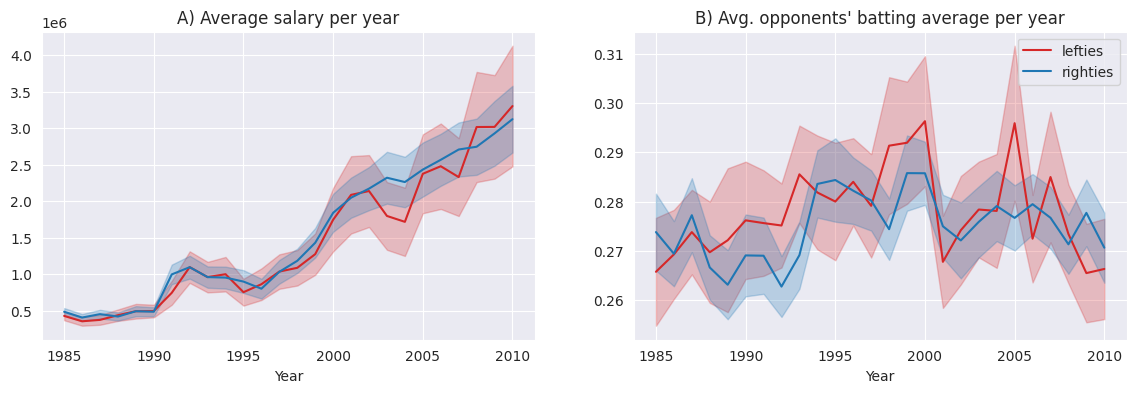

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(14,4))

for idx, col_agg in enumerate(["salary", "BAOpp"]):
    df_col_agg = df.groupby(["yearID", "throws"])[col_agg].agg(["mean", "sem"]).reset_index()
    df_col_agg_L = df_col_agg[df_col_agg.throws == "L"]
    df_col_agg_R = df_col_agg[df_col_agg.throws == "R"]

    axs[idx].plot(df_col_agg_L["yearID"], df_col_agg_L["mean"], color="tab:red", label="lefties")
    axs[idx].fill_between(df_col_agg_L["yearID"], df_col_agg_L["mean"] - 1.96 * df_col_agg_L["sem"], 
                     df_col_agg_L["mean"] + 1.96 * df_col_agg_L["sem"], alpha=0.25
                     , color="tab:red")
    axs[idx].plot(df_col_agg_R["yearID"], df_col_agg_R["mean"], color="tab:blue", label="righties")
    axs[idx].fill_between(df_col_agg_R["yearID"], df_col_agg_R["mean"] - 1.96 * df_col_agg_R["sem"] , 
                     df_col_agg_R["mean"] + 1.96 * df_col_agg_R["sem"], alpha=0.25
                     , color="tab:blue")
    
    print("avg", col_agg, "in 1999 for lefties:", df_col_agg_L[df_col_agg_L["yearID"] == 1999]["mean"].values[0])
    print("avg", col_agg, "in 1999 for righties:", df_col_agg_R[df_col_agg_R["yearID"] == 1999]["mean"].values[0])

axs[0].set_title("A) Average salary per year")
axs[1].set_title("B) Avg. opponents' batting average per year")
axs[0].set_xlabel("Year")
axs[1].set_xlabel("Year")
plt.legend()

**3.4 —** /Discuss:/ Contrast the results obtained in Tasks 3.1 / 3.3 / 3.3 with the results obtained in Tasks 2.7 and 2.8. Are left-handed better than right-handed pitchers? Do they earn better salaries? Explain why the analysis might have reached different results.

**A**: It seems that left-handed pitchers are similar to right-handed ones and earn similar salaries. The number of
left handed pitchers has drastically decreased in the league (from ~33% in 1985 to ~26% in 2010), while salary
and opponent batting average increased. This creates a simpson paradox that lead to the results in the previous analysis.

**3.5 —** Before showing the final results to Mr. Russo, you pass them by Ms. Sakota once more. She looks happier now, but still looks a bit concerned. She asks you to perform a sanity check on the missing data for the period you are considering. Specifically, she is worried that there are significantly more missing salaries for left-handed pitchers or for right-handed pitchers.

- Create a plot with 10 inches of width and 4 inches of height. The plot should depict the fraction of missing salary  salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot. 
- Print the fraction of left-handed pitchers with salary data missing for the year 2002. 
- /Discuss:/ According to the plot, are there significantly more missing salaries for left-handed pitchers?


Percent missing 2002: 0.3817204301075269


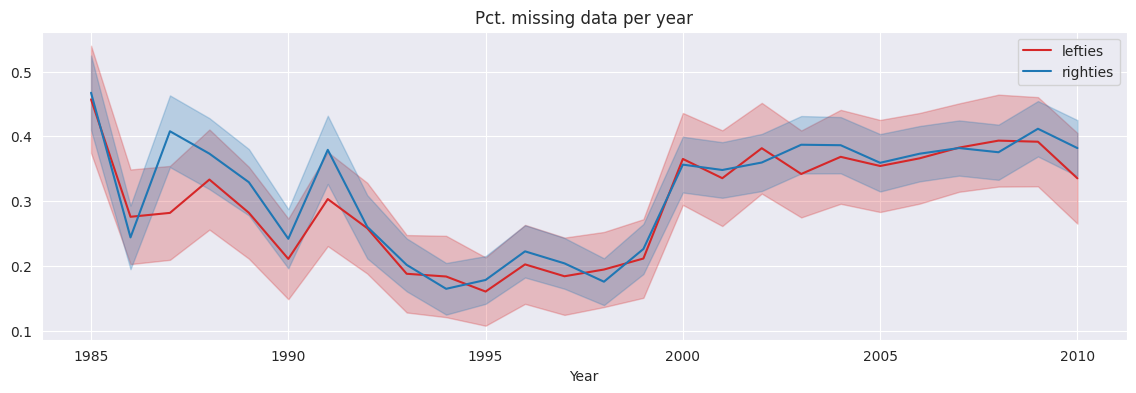

In [30]:
fig, axs = plt.subplots(1, 1, figsize=(14,4))

axs = [axs]
for idx, col_agg in enumerate(["salary"]):
    col_agg2 = "is_na" + col_agg
    df[col_agg2] = (df["salary"].isna()).astype(int)
    df_col_agg = df.groupby(["yearID", "throws"])[col_agg2].agg(["mean", "sem"]).reset_index()
    df_col_agg_L = df_col_agg[df_col_agg.throws == "L"]
    df_col_agg_R = df_col_agg[df_col_agg.throws == "R"]
    print("Percent missing 2002:", df_col_agg_L[df_col_agg_L.yearID == 2002]["mean"].values[0])
    axs[idx].plot(df_col_agg_L["yearID"], df_col_agg_L["mean"], color="tab:red", label="lefties")
    axs[idx].fill_between(df_col_agg_L["yearID"], df_col_agg_L["mean"] - 1.96 * df_col_agg_L["sem"], 
                     df_col_agg_L["mean"] + 1.96 * df_col_agg_L["sem"], alpha=0.25
                     , color="tab:red")
    axs[idx].plot(df_col_agg_R["yearID"], df_col_agg_R["mean"], color="tab:blue", label="righties")
    axs[idx].fill_between(df_col_agg_R["yearID"], df_col_agg_R["mean"] - 1.96 * df_col_agg_R["sem"] , 
                     df_col_agg_R["mean"] + 1.96 * df_col_agg_R["sem"], alpha=0.25
                     , color="tab:blue")
axs[0].set_title("Pct. missing data per year")
axs[0].set_xlabel("Year")
plt.legend();


**3.6 –**  /Discuss:/ If 95% of the salaries of right-handed pitchers were missing and none for the left-handed pitchers, what problem could you envision could happen downstream when you analyzed the data?

**A1**: That data is missing not at random, and that perhaps right-handed people were not well represented in the data. For example, it could be that only very good right-handed players are represented in the data. This means thatresults obtained downstream may not reflect reality very well.


**A2**: That maybe we do not have enough data to make meaningful comparisons.